In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 

# Question 1

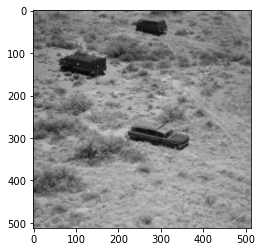

In [10]:
path = r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\7.1.10.tiff'
Img = plt.imread(path)
# print(I)
plt.imshow(Img,cmap='gray')
plt.show()

In [3]:
print(f'Maximum & Minimum intensity of pixels in the image are {np.max(Img)} & {np.min(Img)} respectively ')
print(f'Resolution of image is {Img.shape}')
print('Number of bits needed per pixel is 8 bits because maximum intensity is 223 and hence 8 bits are required to represent it')
size = os.path.getsize(path)
print(f'Size of compressed file in kb = {size/1024}')
print(f'Number of pixels = {512*512}')
print(f"Assuming 1byte per pixel the compression ratio is {size/np.square(512)}")


Maximum & Minimum intensity of pixels in the image are 212 & 15 respectively 
Resolution of image is (512, 512)
Number of bits needed per pixel is 8 bits because maximum intensity is 223 and hence 8 bits are required to represent it
Size of compressed file in kb = 256.130859375
Number of pixels = 262144
Assuming 1byte per pixel the compression ratio is 1.0005111694335938


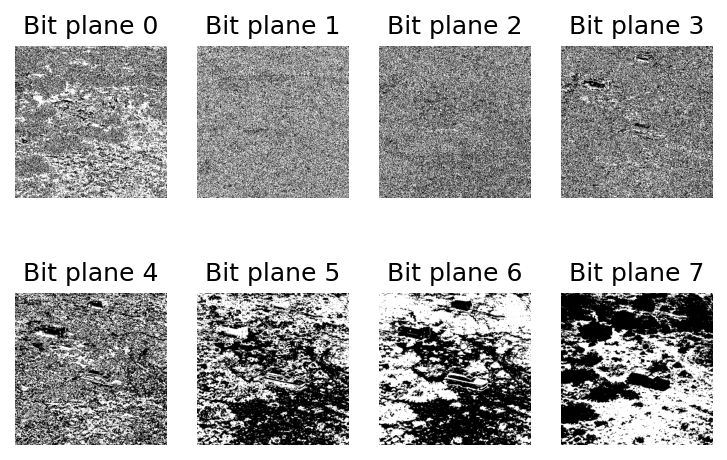

In [4]:
def extract_bitplane(img, plane_number):
    bitplane = np.empty(img.shape)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            binary = np.binary_repr(img[row, col], 8)[::-1]
            bitplane[row, col] = int(binary[plane_number])
    return 255 * bitplane

def display_bitplanes(img):
    plt.figure(dpi=150)
    for plane in range(8):
        plt.subplot(2, 4, plane + 1)
        bp = extract_bitplane(img, plane)
        plt.imshow(bp, cmap='gray')
        plt.axis('off')
        plt.title(f'Bit plane {plane}')
    plt.show()

display_bitplanes(Img)


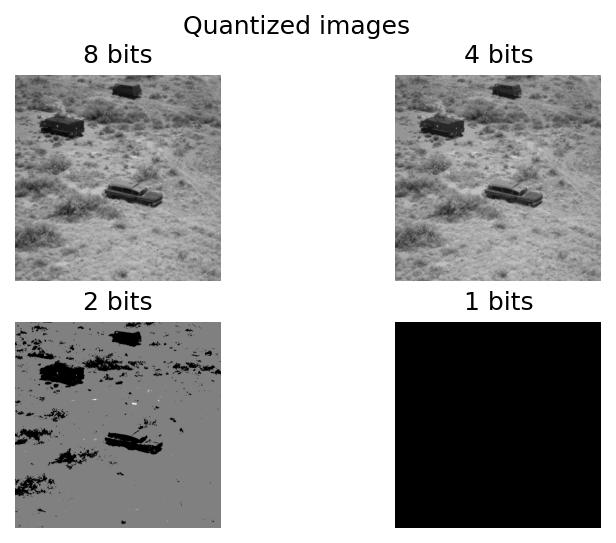

In [12]:
def quantize_image(img, bits):
    quantization_levels = 2**bits
    levels = np.linspace(0, 255, quantization_levels, dtype=np.uint8)
    return np.uint8(np.digitize(img, levels))

def display_quantized_images(img, bits_list):
    plt.figure(dpi=150)
    for i, bits in enumerate(bits_list):
        plt.subplot(2, 2, i + 1)
        quantized_img = quantize_image(img, bits)
        plt.imshow(quantized_img, cmap='gray')
        plt.title(f'{bits} bits')
        plt.axis('off')
    plt.suptitle("Quantized images")
    plt.show()

display_quantized_images(Img, [8, 4, 2, 1])

# Question 2

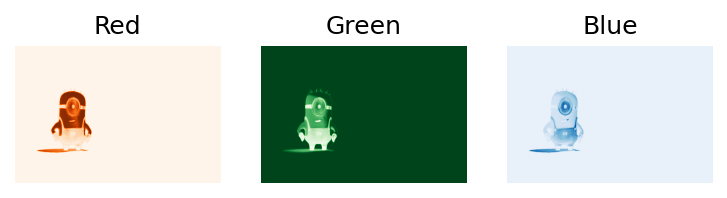

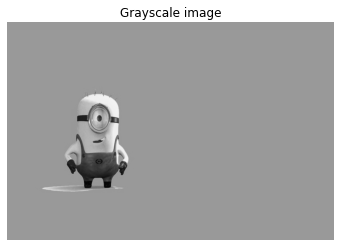

In [14]:
def display_rgb_channels(img):
    plt.figure(dpi=150)
    Layer=['Red', 'Green', 'Blue']
    for i, channel in enumerate(['Oranges', 'Greens', 'Blues']):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img[..., i], cmap=channel)
        plt.axis('off')
        plt.title(Layer[i])
    # plt.suptitle("RGB channels")
    plt.show()

def rgb_to_grayscale(img):
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

img=plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\fg1.jpg")
display_rgb_channels(img)
gray = rgb_to_grayscale(img)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale image")
plt.show()



Most frequenttly used color is (1, 255, 19)


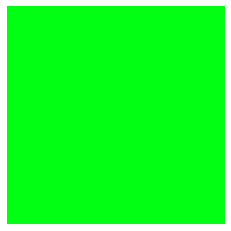

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def most_frequent_color(img):
    flat_img = img.reshape(-1, 3)
    color_counts = {}
    for color in flat_img:
        color_tuple = tuple(color)
        if color_tuple in color_counts:
            color_counts[color_tuple] += 1
        else:
            color_counts[color_tuple] = 1
    most_frequent_color = max(color_counts, key=color_counts.get)
    return most_frequent_color

color=most_frequent_color(img)

def int_tuple_to_color(color_tuple):
    color = np.array(color_tuple, dtype=np.uint8)
    color = color.reshape(1, 1, 3)
    return color
# color = np.array(color, dtype=np.uint8)
# color1 = color.reshape(1, 1, 3)
print(f"Most frequenttly used color is {color}")
color = int_tuple_to_color(color)
plt.imshow(color)
plt.axis('off')
plt.show()

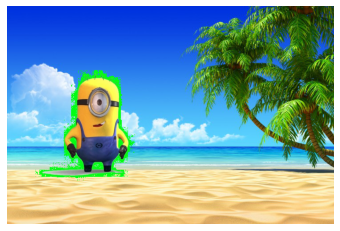

In [13]:
def Merge1(foreground, background):
    merged_image = np.zeros(foreground.shape, dtype=np.uint8)
    for row in range(foreground.shape[0]):
        for col in range(foreground.shape[1]):
            if (foreground[row, col] == [1, 255, 19]).all():
                merged_image[row, col] = background[row, col]
            else:
                merged_image[row, col] = foreground[row, col]
    return merged_image


foreground = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\fg1.jpg")
background = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\bg1.jpg")
Merged_image = Merge1(foreground, background)
plt.imshow(Merged_image)
plt.axis('off')
plt.show()
